# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load data
df = pd.read_csv('/content/Superstore Marketing Data - Sheet1.csv')

In [3]:
# check first five rows of dataset
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [6]:
# number of rows and columns
df.shape

(2240, 22)

In [9]:
#check duplicate
df.duplicated().sum()

0

**There are no duplicate values in the dataset.**

In [7]:
# information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**We can see above that there are 24 null values in the income column, we will handle them in further codes.**

In [13]:
# find mean of the incom
mean_income = df['Income'].mean()
# replace null values  in income column with mean of income
df['Income'].fillna(mean_income, inplace=True)

In [14]:
# checking null values after the replacement of null values with mean in income column
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [15]:
# some statistical values of each column
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


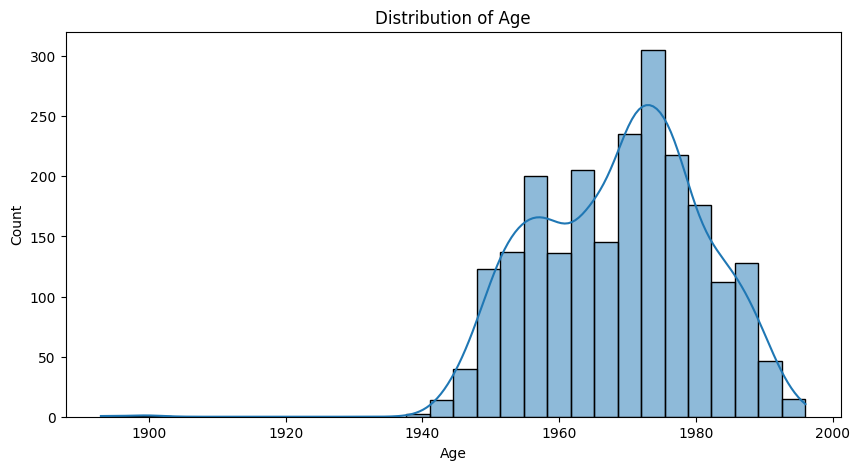

In [18]:
# Distribution of age
plt.figure(figsize = (10,5))
sns.histplot(df['Year_Birth'], bins =30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

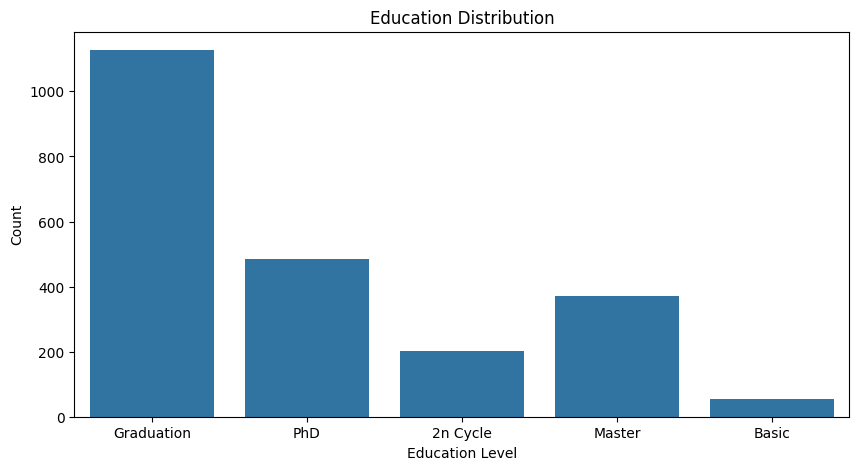

In [19]:
# Education distribution
plt.figure(figsize = (10, 5))
sns.countplot(x=df['Education'], data = df)
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

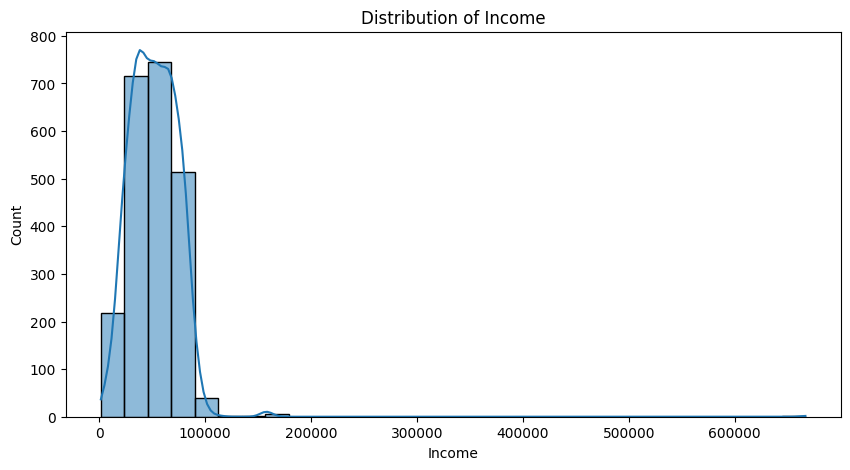

In [20]:
# Distribution of Income
plt.figure(figsize = (10, 5))
sns.histplot(df['Income'], bins=30, kde = True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [28]:
# First calculate the measures of central tendencies
#calculate mean
key_variables = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']
mean = df[key_variables].mean()
print(f"Mean of the key variables:\n {mean}")

Mean of the key variables:
 Income               52247.251354
Recency                 49.109375
MntWines               303.935714
MntFruits               26.302232
MntMeatProducts        166.950000
MntFishProducts         37.525446
NumDealsPurchases        2.325000
MntGoldProds            44.021875
NumWebPurchases          4.084821
NumWebVisitsMonth        5.316518
dtype: float64


In [29]:
#calculate median
key_variables = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']
median = df[key_variables].median()
print(f"Median of the key variables:\n {median}")

Median of the key variables:
 Income               51741.5
Recency                 49.0
MntWines               173.5
MntFruits                8.0
MntMeatProducts         67.0
MntFishProducts         12.0
NumDealsPurchases        2.0
MntGoldProds            24.0
NumWebPurchases          4.0
NumWebVisitsMonth        6.0
dtype: float64


In [30]:
#calculate mode
key_variables = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']
mode = df[key_variables].mode()
print(f"Mode of the key variables:\n {mode}")

Mode of the key variables:
          Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0  52247.251354       56         2          0                7   

   MntFishProducts  NumDealsPurchases  MntGoldProds  NumWebPurchases  \
0                0                  1             1                2   

   NumWebVisitsMonth  
0                  7  


In [31]:
#measures of dipersen
#Variance
key_variables = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']
variance = df[key_variables].var()
print(f"Variance of key variables: \n {variance}")

Variance of key variables: 
 Income               6.268913e+08
Recency              8.388237e+02
MntWines             1.132978e+05
MntFruits            1.581926e+03
MntMeatProducts      5.094743e+04
MntFishProducts      2.984325e+03
NumDealsPurchases    3.733542e+00
MntGoldProds         2.721442e+03
NumWebPurchases      7.721252e+00
NumWebVisitsMonth    5.888606e+00
dtype: float64


In [32]:
#Standard Deviation
key_variables = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']
standard_daviation = df[key_variables].std()
print(f"Standard Deviation of key variables: \n {standard_daviation}")

Standard Deviation of key variables: 
 Income               25037.797168
Recency                 28.962453
MntWines               336.597393
MntFruits               39.773434
MntMeatProducts        225.715373
MntFishProducts         54.628979
NumDealsPurchases        1.932238
MntGoldProds            52.167439
NumWebPurchases          2.778714
NumWebVisitsMonth        2.426645
dtype: float64


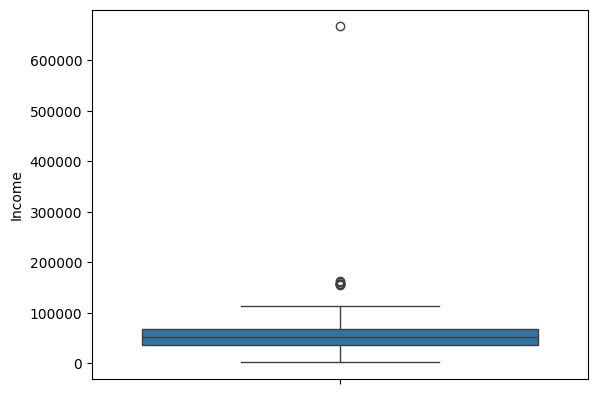

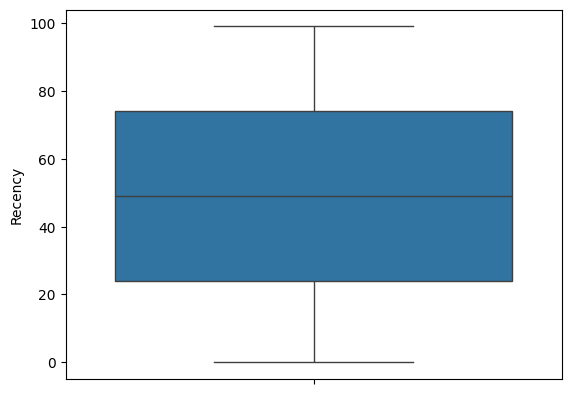

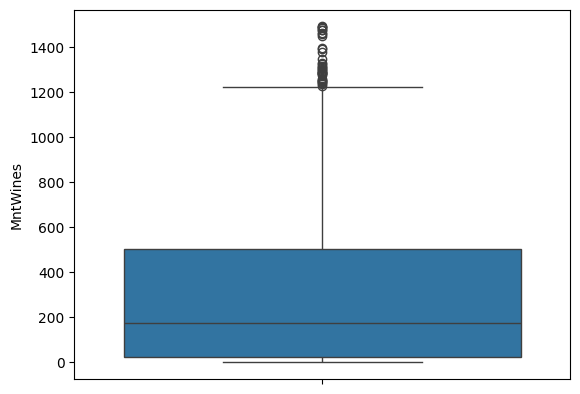

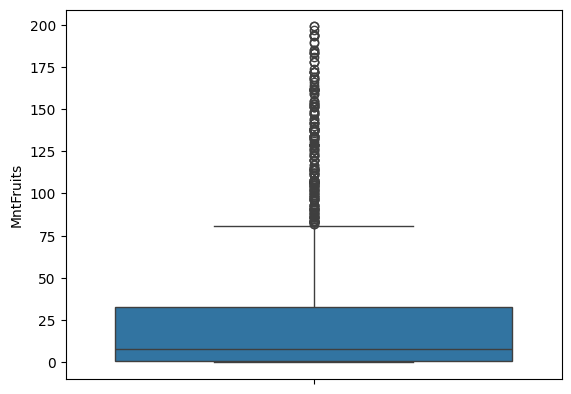

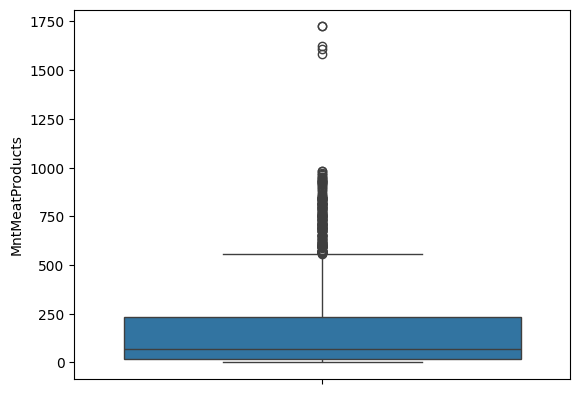

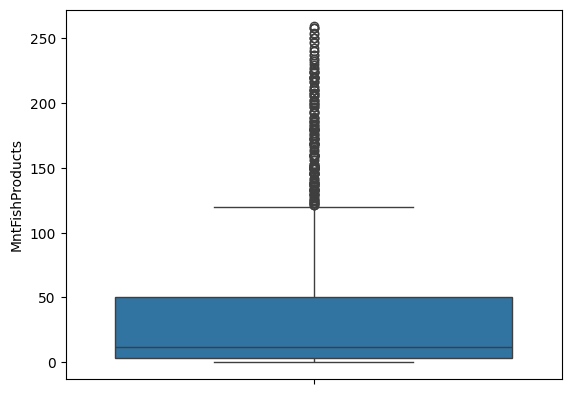

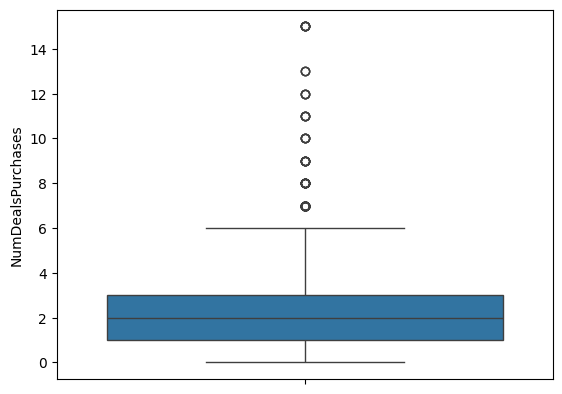

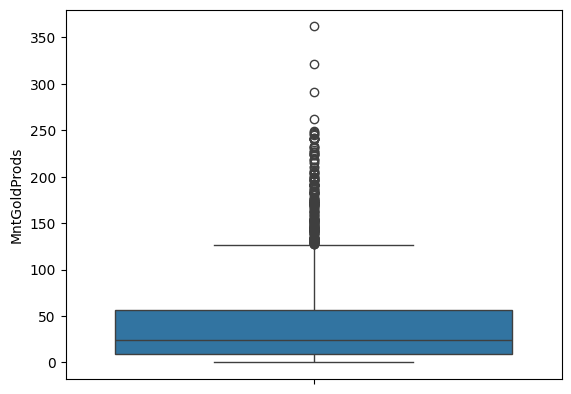

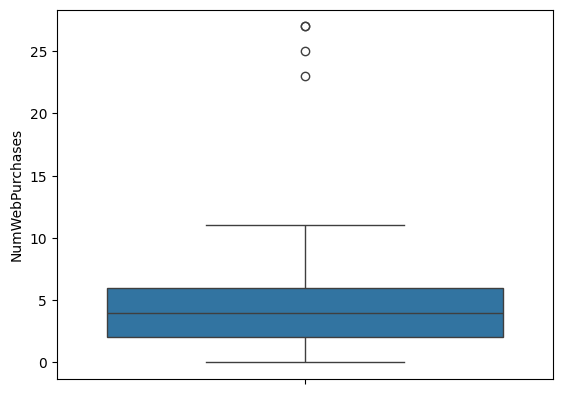

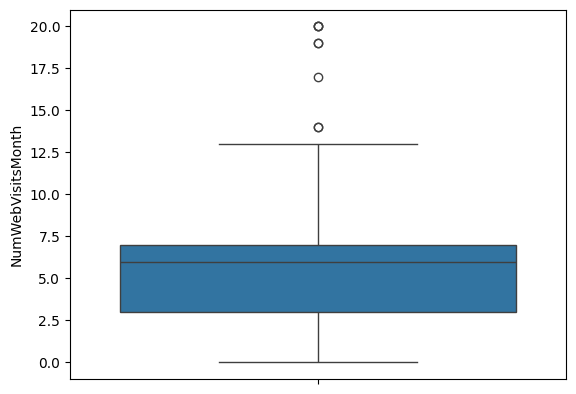

In [34]:
## Identificaiton of Outliers
key_variables = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']

for variable in key_variables:
    sns.boxplot(y= df[variable])
    plt.show()



**Above code is just for identification of outliers, however we can outliers using many methods. eg. Interquartile range (IQR)**

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [35]:
from scipy.stats import norm

In [40]:
# pobability distributions
total_purchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
p_purchases = total_purchases.mean()/total_purchases.max() # proportion to the average number of purchases to the maximum number of puchases
expected_purchases = total_purchases.mean() #expected purchases

In [41]:
mu_income, sigma_income = df['Income'].mean(), df['Income'].std()
prob_income_gt_70000 = 1 - norm.cdf(70000, mu_income, sigma_income) #finding the probability of income more than 70K
# what is PPF = Also known as the inverse of the cdf, this function returns the z-score (number of standard deviations from the mean) corresponding to the given probability.
expected_income = mu_income + sigma_income*norm.ppf(prob_income_gt_70000) #expected income of individuals who earn more than $70,000, based on the normal distribution of income.


In [42]:
print("Probability Distributions and Calculated Values:")
print(f"Total Purchases:")
print(f"  Probability of a purchase: {p_purchases:.4f}")
print(f"  Expected number of purchases: {expected_purchases:.2f}")

print(f"\nIncome:")
print(f"  Probability of income > $70,000: {prob_income_gt_70000:.4f}")
print(f"  Expected income: {expected_income:.2f}")

Probability Distributions and Calculated Values:
Total Purchases:
  Probability of a purchase: 0.3378
  Expected number of purchases: 14.86

Income:
  Probability of income > $70,000: 0.2392
  Expected income: 34494.50


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

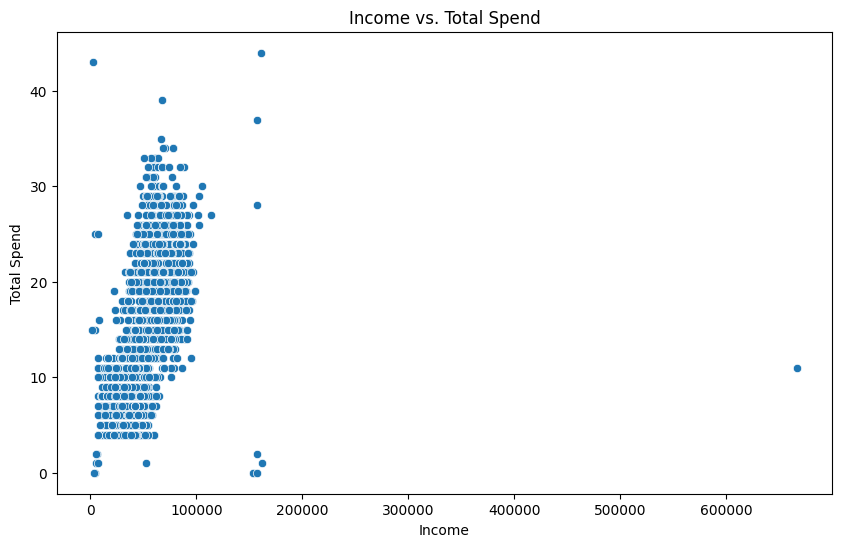

In [46]:
df['TotalSpend'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'Income', y='TotalSpend', data = df )
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.title('Income vs. Total Spend')
plt.show()

In [50]:
# Convert 'Graduation' column to numerical representation if applicable
# For example, if 'Graduation' represents education levels, you can map them to numbers:
education_mapping = {'Graduation': 1, 'PhD': 2, 'Master': 3, 'Basic': 4, '2n Cycle': 5}
df['Education_Numeric'] = df['Education'].map(education_mapping)

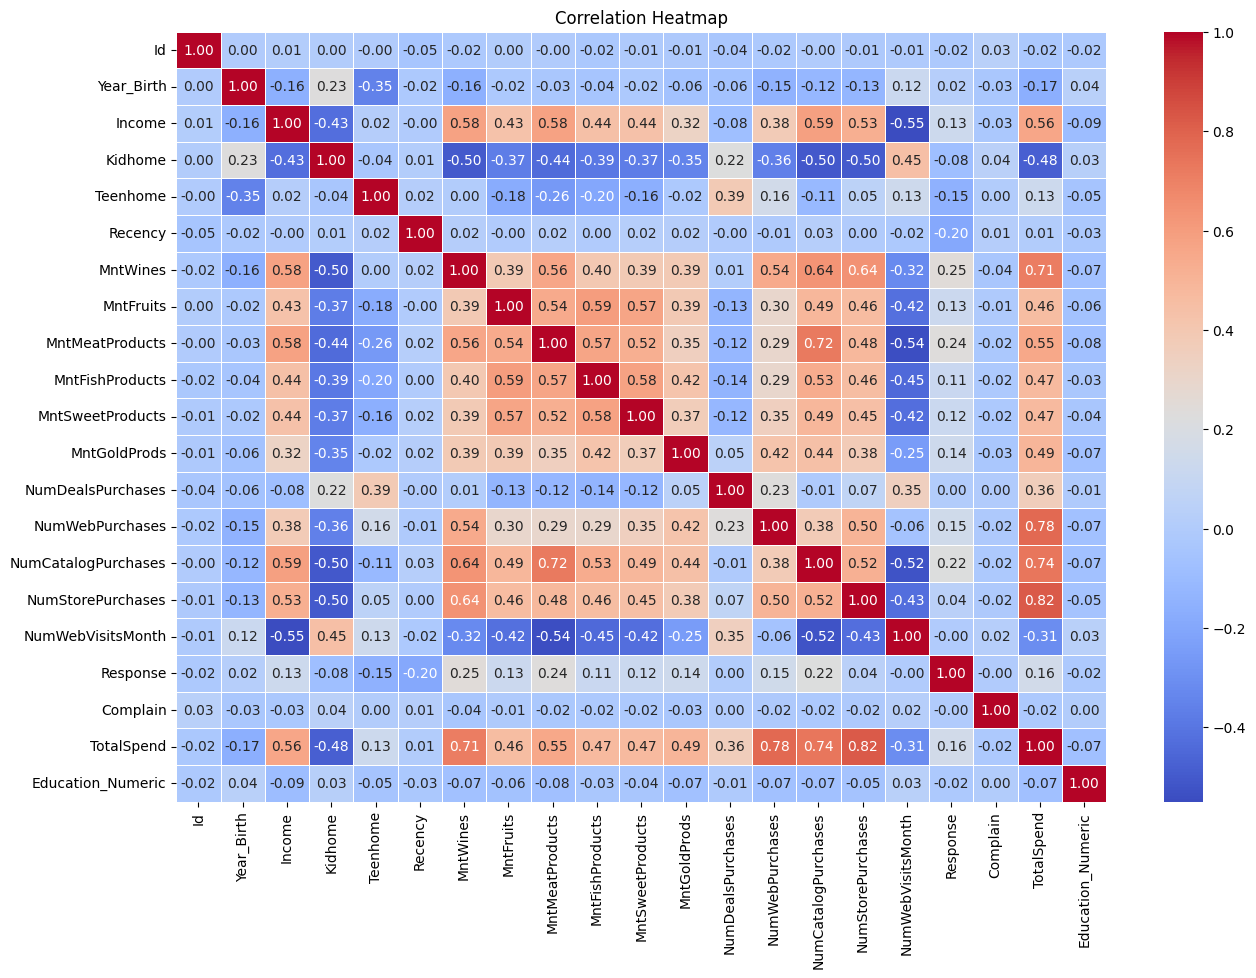

In [55]:
#correlation heatmap to show the relationships among the variables.

#calculate correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

#visualize correlation
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = '.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**As we can see above that most the customer less than $ 20k.**

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

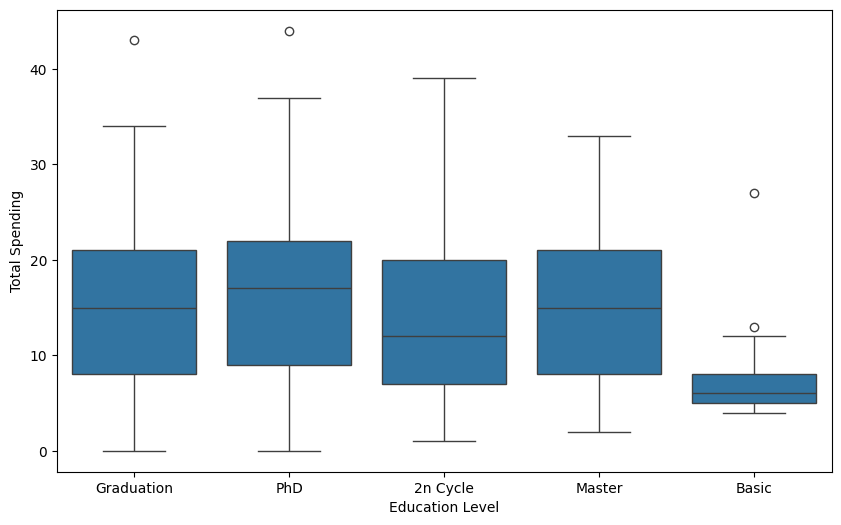

In [56]:
#insights bases on Education

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='TotalSpend',data=df)
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.show()

**Insights: As we can see above that customer with Education level PhDs do maximum spending.**

**Recommendation: Tailor marketing messages and offers to appeal to customers with a higher education level.**

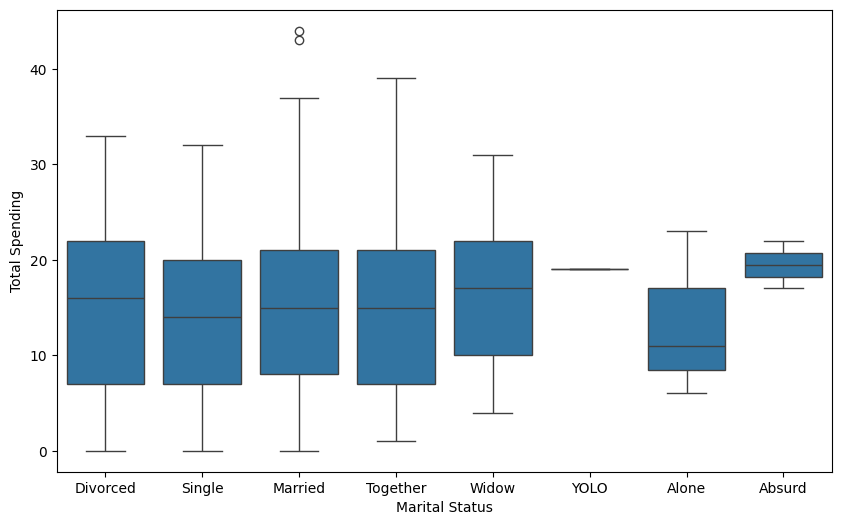

In [57]:
# Insights based on marital status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='TotalSpend',data=df)
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()

**Insights: Divorced & widow customers tend to have higher spending compared to other marital statuses.**

**Recommendation: Develop promotions or loyalty programs targeting married customers to enhance their engagement and spending.**


## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍